In [1]:
import re
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing, model_selection

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Data loading

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train=mnist.train.images
X_test=mnist.test.images
X = np.vstack((X_train, X_test))

y_train=mnist.train.labels
y_test=mnist.test.labels
y = np.vstack((y_train, y_test))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.999, random_state=42, stratify=y)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
X_train.shape

(65, 784)

In [8]:
X_test.shape

(64935, 784)

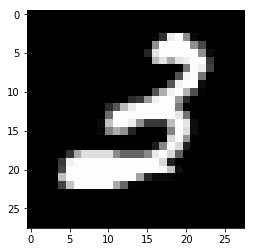

In [9]:
plt.imshow(X_train[4].reshape(28, 28), plt.cm.gray)

In [10]:
_, train_counts = np.unique(np.argmax(y_train,1), return_counts=True)
train_max = np.argmax(train_counts)
print(train_counts)
print(train_max)

[ 3  3  8  9 11  9  4  5  5  8]
4


In [11]:
baseline_acc = np.mean(np.argmax(y_test,1) == train_max)
baseline_acc

0.09574189574189575

# Optimal Encoding

In [12]:
from networks import MLP
from OptimalEncoding import OptimalEncoding

## Classification

In [13]:
n_in = X_train.shape[-1]
k = 2
n_out = y_train.shape[-1]

sigma=2

widths = [300, 300]

In [14]:
X_train.shape

(65, 784)

In [15]:
encoder = MLP(n_in, k, widths)
decoder = MLP(k, n_out, widths)

In [16]:
oe = OptimalEncoding(encoder, decoder, k)

100%|██████████| 5000/5000 [00:55<00:00, 90.44it/s] 


Sigma: 2.000000
Final task loss: -7.493049


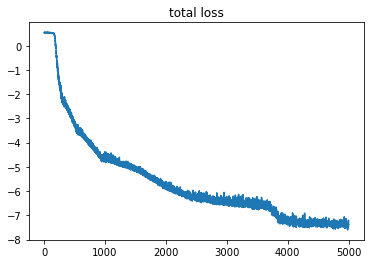

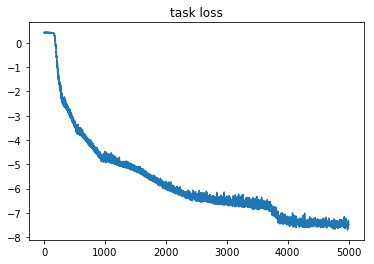

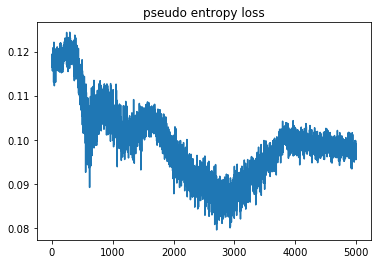

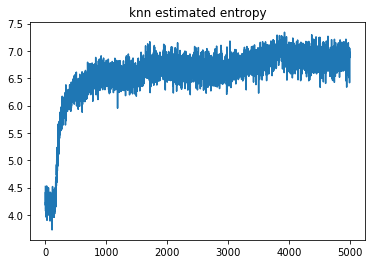

In [17]:
oe.train(X_train, y=y_train, 
         min_entropy=True, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 5,
         epochs=10000, batch_size=64, lr=1e-4)

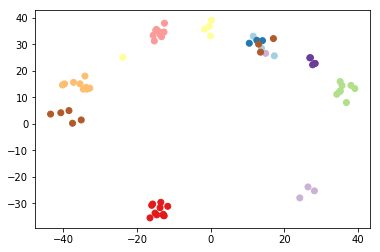

In [18]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [19]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

train acc = 0.877


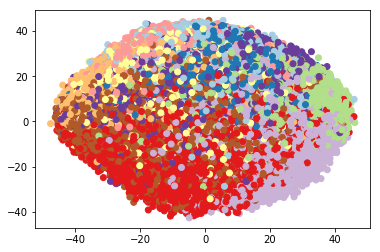

In [20]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [21]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

test acc = 0.313


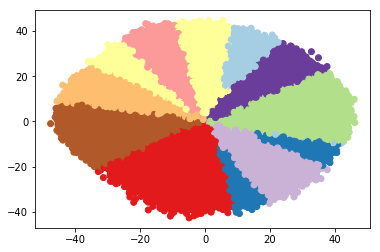

In [22]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))

In [23]:
1/float(y.shape[-1])

0.1

# SubOptimal Encoding

In [24]:
n_in = X.shape[-1]
k = 2
n_out = y.shape[-1]

sigma = 2

widths = [300, 300]

In [25]:
encoder = MLP(n_in, k, widths)
decoder = MLP(k, n_out, widths)

In [26]:
oe = OptimalEncoding(encoder, decoder, k)

100%|██████████| 5000/5000 [00:50<00:00, 98.25it/s] 


Sigma: 2.000000
Final task loss: -7.117847


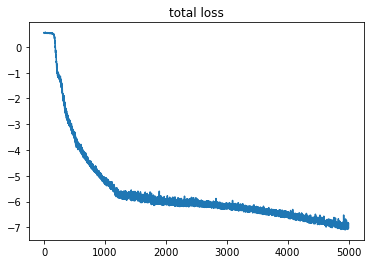

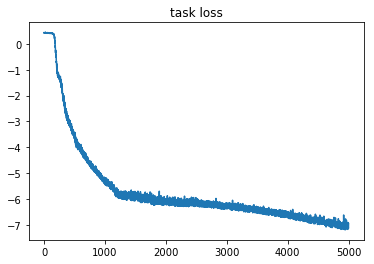

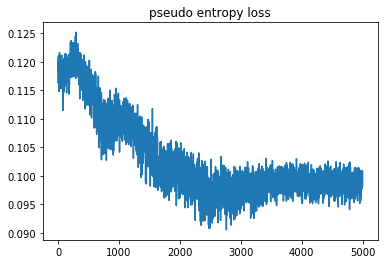

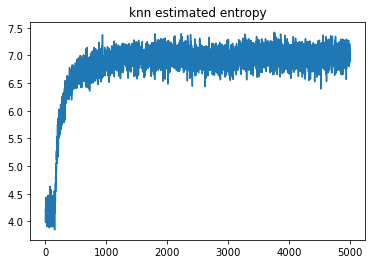

In [27]:
oe.train(X_train, y=y_train, 
         min_entropy=False, sigma = sigma, task = 'classification', 
         heteroskedastic = True, n_samples = 5,
         epochs=10000, batch_size=64, lr=1e-4)

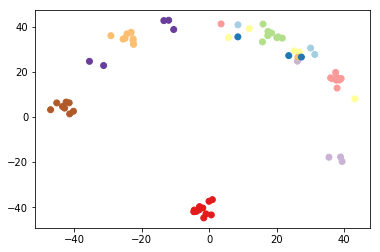

In [28]:
zhat_train = oe.encode(X_train, sigma=sigma)
plt.scatter(zhat_train[:,0], zhat_train[:,1], c = np.argmax(y_train,1), cmap=plt.get_cmap('Paired'))

In [29]:
pred_train = oe.decode(zhat_train)
pred_train = np.argmax(pred_train,1)

true_train = np.argmax(y_train,1)

acc_train = np.mean(pred_train == true_train)
print('train acc = %.3f' %acc_train)

train acc = 0.862


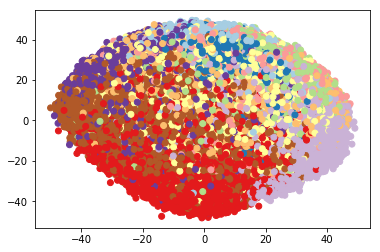

In [30]:
zhat_test = oe.encode(X_test, sigma=sigma)
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = np.argmax(y_test,1), cmap=plt.get_cmap('Paired'))

In [31]:
pred_test = oe.decode(zhat_test)
pred_test = np.argmax(pred_test,1)

true_test = np.argmax(y_test,1)

acc_test = np.mean(pred_test == true_test)
print('test acc = %.3f' %acc_test)

test acc = 0.277


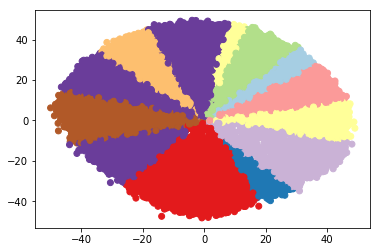

In [32]:
plt.scatter(zhat_test[:,0], zhat_test[:,1], c = pred_test, cmap=plt.get_cmap('Paired'))

In [33]:
1/float(y.shape[-1])

0.1